## LOAD LIBS and image to analyze

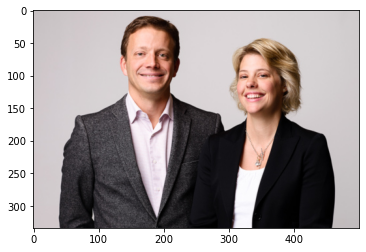

In [9]:
from mtcnn import MTCNN
import cv2
import matplotlib.pyplot as plt

IMAGE_PATH = r'res/couple.jpg'
detector = MTCNN()
image = cv2.imread(IMAGE_PATH)
# cv2.imshow("image",image)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

## Using haarcascade_frontalface_alt2.xml from OpenCV
### UDPATE THIS VARIABLE TO YOUR MODEL ->`MASK_CLASSIFIER_PATH`, `IMAGE_PATH`


Detected: 2 faces


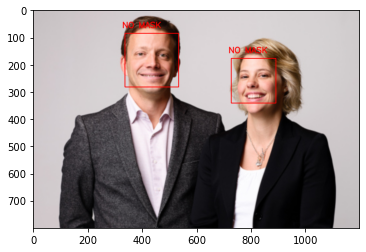

In [12]:
import os
import numpy as np
from tensorflow.keras.models import load_model

IMAGE_PATH = r'res/couple.jpg'

cascPath = os.path.dirname(
    cv2.__file__) + "/data/haarcascade_frontalface_alt2.xml"
faceCascade = cv2.CascadeClassifier(cascPath)

MASK_CLASSIFIER_PATH = r'models/model_20220104-111420.h5'

mask_classiefier = load_model(MASK_CLASSIFIER_PATH)

image = cv2.imread(IMAGE_PATH)
image = cv2.resize(image, (1200,800))
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
color_mask = (0, 255, 0)
color_no_mask = (0,0,255)

width_sec = 160
height_sec = 160
depth_sec = 3

# Text info
font = cv2.FONT_HERSHEY_SIMPLEX
fontScale = 1

# faces_detected = []

# detect faces
faces = faceCascade.detectMultiScale(gray,
                                    scaleFactor=1.1,
                                    minNeighbors=8,
                                    minSize=(60, 60),
                                    flags=cv2.CASCADE_SCALE_IMAGE)


# Debug info
print("Detected: {} faces".format(len(faces)))


for (x,y,w,h) in faces:

    detected = np.zeros(shape=(w,h,3))
    detected = image[y : y + h, x : x + w, :]
    # faces_detected.append(detected)
    # cv2.rectangle(image, (x, y), (x + w, y + h),(0,255,0), 2)

    # detect mask
    # resize image to the next classifier
    detected = cv2.resize(detected, (width_sec,height_sec))
    
    # add new dimension
    
    detected = detected[np.newaxis, ...]
    check_mask = np.argmax(mask_classiefier.predict(detected))
    
    # According to classifier class 0 is mask on face
    # Class 1 is no mask detected on face
    if check_mask == 0:
        cv2.rectangle(image, (x, y), (x + w, y + h), color_mask, 2)
        cv2.putText(image, 'Mask', (x - 10, y-20 ), font, 
                   fontScale, color_mask, thickness, cv2.LINE_AA)
    else:
        cv2.rectangle(image, (x, y), (x + w, y + h), color_no_mask, 2)
        cv2.putText(image, 'NO MASK', (x - 10, y-20 ), font, 
                    fontScale, color_no_mask, thickness, cv2.LINE_AA)  
    


plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))